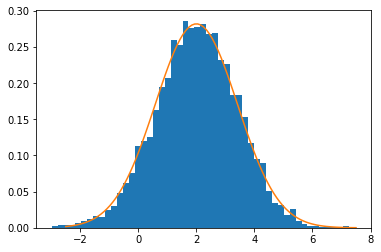

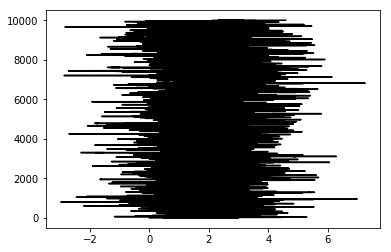

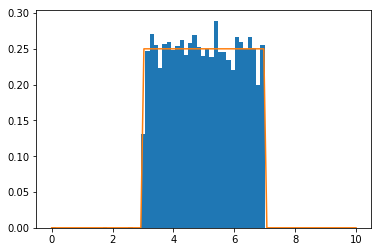

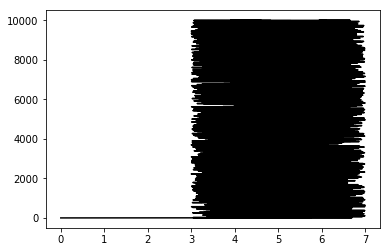

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def gaussprob(x):
    mu = 2.
    var = 2.
    norm = 1/np.sqrt(2 * np.pi * var)
    return norm * np.exp(-(np.power((x - mu),2))/(2*var))

def uniformprob(x):
    if((x>3) and (x<7)):
        return 0.25
    else:
        return 0

def samplepdf(x):
    return np.random.normal(loc=x, scale=1.)
  
#produces a single step using MCMC, f is the function to be sampled and q is a proposal pdf
def MCMCStep(x, f, q):
    xq = q(x)
    r = np.random.rand()
    if((f(x)-f(x))==f(x)):
        return xq
    if((f(xq)/f(x))>r):
        return xq
    else:
        return x
    
x = np.linspace(-2.5, 7.5, 100)
y = gaussprob(x)

x2 = np.linspace(0., 10., 100)
y2 = []
for i in range(len(x2)):
    y2.append(uniformprob(x2[i]))

samples=[0]
samples2=[0]
N = 1e4

for i in range(int(N)):
    samples.append(MCMCStep(samples[i], gaussprob, samplepdf))
    samples2.append(MCMCStep(samples2[i], uniformprob, samplepdf))
plt.figure()
plt.hist(samples, bins=50, normed=1)
plt.plot(x,y)

plt.figure()
t = np.arange(len(samples))
plt.plot(samples, t, 'k-')

plt.figure()
plt.hist(samples2, bins=50, normed=1)
plt.plot(x2,y2)

plt.figure()
t2 = np.arange(len(samples2))
plt.plot(samples2, t2, 'k-')

plt.show()
 

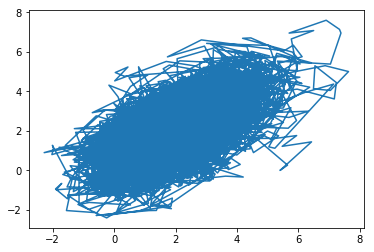

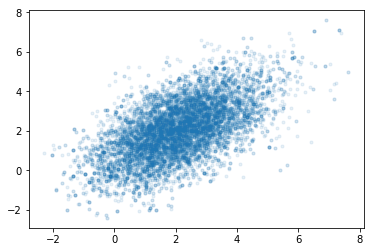

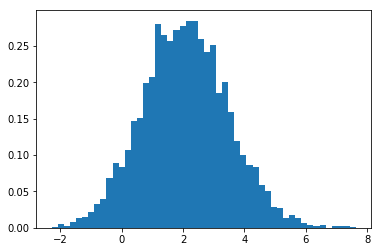

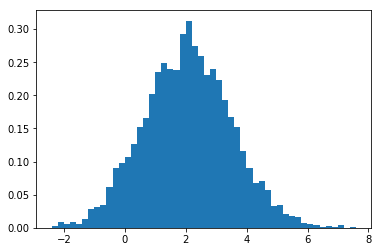

In [65]:
def multivariategauss(x):
    mu = np.array([2,2])
    var = np.array([[2., 1.2], [1.2,2.]])
    norm = 1./np.sqrt(2*np.pi*np.linalg.det(var))
    a = np.matmul(np.ndarray.transpose(x-mu), np.linalg.inv(var))
    b = np.matmul(a, (x-mu))
    return np.exp(-.5*b)*norm

def samplepdf2d(x):
    return np.random.normal(loc=x, scale=1.)

samples3 = np.empty((int(N),2))
samples3[0] = [0,0]
for i in range(int(N)-1):
    samples3[i+1] = MCMCStep(samples3[i], multivariategauss, samplepdf2d)    

plt.figure()
plt.plot(samples3[:,0], samples3[:,1], animated=True)
    
plt.figure()
plt.scatter(samples3[:,0], samples3[:,1], alpha=0.1, marker='.')
plt.figure()
plt.hist(samples3[:,0], normed=1, bins=50)
plt.figure()
plt.hist(samples3[:,1], normed=1, bins=50)
plt.show()